### Simple CNN 1
The code below is a simple implementation of cnn with the same basic architecture found in ALVINN

In [1]:
import matplotlib
# Remove padding around screen

from PIL import Image
from os import walk
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import numpy,keras,PIL,sys


sys.path.insert(0, "/home/jason/sproj/scripts/")
from train import DataLoader
import train

display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
filepath = "../datasets/car-data-3-4/"
dl = DataLoader(filepath,10000)

#filepath = "../datasets/track_sess_2-23/"
train_x, train_y = dl.load()


(10001, 120, 160, 3)


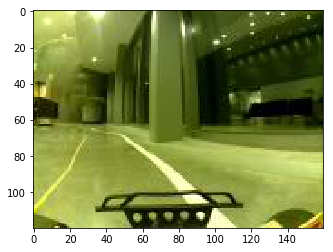

In [3]:
print(train_x.shape)
imgplot = plt.imshow(train_x[10])

In [4]:
import models

# Load callbacks
checkpointer = keras.callbacks.ModelCheckpoint(
    filepath='../outputs/track_cnnw3.h5',
    verbose=1,
    save_best_only=True)


# Get training image row, col, channels
img_sz = train_x.shape[1:]
model = models.get_nvidia_model(1)
#train_generator, validation_generator, n_train, n_val \
#    = train.make_generators(20000, limit=limit, batch_size=batch_size, aug_perc=aug_perc)

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 100, 160, 3)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 100, 160, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 80, 24)        1824      
_________________________________________________________________
elu_1 (ELU)                  (None, 50, 80, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 40, 32)        19232     
_________________________________________________________________
elu_2 (ELU)                  (None, 25, 40, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 20, 64)        51264     
__________

In [5]:
model.fit(x=train_x,y=train_y,epochs=40,validation_split=0.2,callbacks=[checkpointer],batch_size=8)

Train on 8000 samples, validate on 2001 samples
Epoch 1/40
8000/8000 [==============================] - 11s 1ms/step - loss: 8.1199 - acc: 0.0239 - val_loss: 6.8419 - val_acc: 0.0355

Epoch 00001: val_loss improved from inf to 6.84193, saving model to ../outputs/track_cnnw3.h5
Epoch 2/40
8000/8000 [==============================] - 10s 1ms/step - loss: 6.6100 - acc: 0.0451 - val_loss: 5.8417 - val_acc: 0.0365

Epoch 00002: val_loss improved from 6.84193 to 5.84173, saving model to ../outputs/track_cnnw3.h5
Epoch 3/40
8000/8000 [==============================] - 10s 1ms/step - loss: 5.7703 - acc: 0.0633 - val_loss: 5.3736 - val_acc: 0.0750

Epoch 00003: val_loss improved from 5.84173 to 5.37357, saving model to ../outputs/track_cnnw3.h5
Epoch 4/40
8000/8000 [==============================] - 10s 1ms/step - loss: 5.4354 - acc: 0.0703 - val_loss: 5.4730 - val_acc: 0.0380

Epoch 00004: val_loss did not improve
Epoch 5/40
8000/8000 [==============================] - 10s 1ms/step - loss: 5.1

KeyboardInterrupt: 